# **Setup**


# **COGS 108 — EDA Checkpoint**
# **Names**


*   Lisa Dang
*   Danny Ha
*   Justin Le
*   Destynee Tau
*   Pauline Thach

# **Research Question**
How does a person’s racial background and personal qualities such as religion affect their desirability as a potential partner? Do factors such as similar interests make a more positive first impression, therefore increasing the likelihood of attraction? Are females or males more likely to secure a date?


In [ ]:
# Imported packages used to create the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import csv
import io

#**Data Cleaning**

To clean this dataset, we eliminated variables that were outside the scope of our research question, since the dataset was expansive to begin with. We discovered that in our dataset, participants may appear multiple times due to their potential matches. Therefore, we filtered out and got rid of data from duplicate participants and also any rows that have missing data. Furthermore, we modified the initial representations of results for clarity (for instance, a value of '0' in a certain category corresponded to an answer of 'No', so we converted '0' to 'No'). Many of the operations we performed were of this "housekeeping" nature.

This particular dataset was relatively clean and we probably could have used it without modification. Minor tweaks, as previously described, were done to make future data analysis easier. We didn't have to standardize any data because the participants had a specific number to choose from for the longer answers. So we had to transform their values to the code provided to us to transfigure it.

Certain variables in the dataset such as the activities is a rating from 1-10 of how important or interested they are in that variable.

**Dataset 1:** Speed Dating dataset

Importing the data to create the table:

In [ ]:
# Assign a variable to the speed dating data file to be read 
dataURL = "https://raw.githubusercontent.com/COGS108/group088_wi21/main/Speed%20Dating%20Dataset/SpeedDatingComplete.csv?token=ALXEC7RX3XEFTD4JCI4VATTAIB5HK"
speedDating_df = pd.read_csv(dataURL)

# Take a look at the original dataset
speedDating_df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# specify certain variables to include
speedDating_df = speedDating_df[['iid','gender', 'match','int_corr', 'age_o', 'samerace', 'race_o', 
                                 'imprace', 'imprelig', 'goal', 'date', 'dec_o', 'attr_o', 
                                 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
                                 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']]

#change column variable names to have easier understanding
speedDating_df.rename(columns={'iid':'Unique identifier'}, inplace=True)
speedDating_df.rename(columns={'gender':'Gender'}, inplace=True)
speedDating_df.rename(columns={'match':'Match?'}, inplace=True)
speedDating_df.rename(columns={'int_corr':'Correlation of interests'}, inplace=True)
speedDating_df.rename(columns={'age_o':'Age of partner'}, inplace=True)
speedDating_df.rename(columns={'samerace':'Same race?'}, inplace=True)
speedDating_df.rename(columns={'race_o':'Race of partner'}, inplace=True)
speedDating_df.rename(columns={'imprace':'Importance of race'}, inplace=True)
speedDating_df.rename(columns={'imprelig':'Importance of religion'}, inplace=True)
speedDating_df.rename(columns={'goal':'Goal'}, inplace=True)
speedDating_df.rename(columns={'date':'How frequent do you go on dates?'}, inplace=True)
speedDating_df.rename(columns={'dec_o':'Meet partner again?'}, inplace=True)
speedDating_df.rename(columns={'attr_o':'Partner rating of attributes'}, inplace=True)
speedDating_df.rename(columns={'tvsports':'tv sports'}, inplace=True)


Since participants show up multiple times in the dataset, we have to update our current dataset with unique individuals to get rid of repetitive data.

In [ ]:
#check for repeated participants 
check_id = speedDating_df['Unique identifier'].duplicated().any()
print(check_id)

#remove duplications and only keep one data from each participant
speedDating_df = speedDating_df.drop_duplicates(subset=['Unique identifier'])
speedDating_df.head


True


<bound method NDFrame.head of       Unique identifier  Gender  Match?  ...  music  shopping  yoga
0                     1       0       0  ...    9.0       8.0   1.0
10                    2       0       0  ...    8.0       3.0   1.0
20                    3       0       0  ...    5.0       8.0   7.0
30                    4       0       0  ...    7.0       1.0   8.0
40                    5       0       0  ...    7.0       8.0   3.0
...                 ...     ...     ...  ...    ...       ...   ...
8268                548       1       1  ...   10.0       4.0   1.0
8290                549       1       0  ...   10.0       8.0   2.0
8312                550       1       0  ...    6.0       6.0   3.0
8334                551       1       0  ...    7.0       7.0   1.0
8356                552       1       1  ...   10.0       7.0   3.0

[551 rows x 29 columns]>

In [ ]:
#replaces current '0' & '1' values with 'Yes' & 'No' where appropriate
speed_bool = speedDating_df['Same race?'].replace({0: 'No', 1: 'Yes'})
speedDating_df['Same race?'] = speed_bool.replace({0: 'No', 1: 'Yes'})

speed_bool = speedDating_df['Match?'].replace({0: 'No', 1: 'Yes'})
speedDating_df['Match?'] = speed_bool.replace({0: 'No', 1: 'Yes'})

speed_bool = speedDating_df['Meet partner again?'].replace({0: 'No', 1: 'Yes'})
speedDating_df['Meet partner again?'] = speed_bool.replace({0: 'No', 1: 'Yes'})

#replaces current '0' & '1' values in the gender column with appropriate gender
speed_bool = speedDating_df['Gender'].replace({0: 'Female', 1: 'Male'})
speedDating_df['Gender'] = speed_bool.replace({0: 'Female', 1: 'Male'})

In [ ]:
#Drops rows with missing data
dropped_rows = speedDating_df.dropna(subset = ["Importance of race", "Importance of religion", "Correlation of interests"],inplace=True)

dropped_rows = speedDating_df.isnull().sum()
print(dropped_rows)

Unique identifier                   0
Gender                              0
Match?                              0
Correlation of interests            0
Age of partner                      0
Same race?                          0
Race of partner                     0
Importance of race                  0
Importance of religion              0
Goal                                0
How frequent do you go on dates?    1
Meet partner again?                 0
Partner rating of attributes        8
sports                              0
tv sports                           0
exercise                            0
dining                              0
museums                             0
art                                 0
hiking                              0
clubbing                            0
reading                             0
tv                                  0
theater                             0
movies                              0
concerts                            0
music       

Our data set no longer has any pertinent data that's missing. There are two variables that have a few rows with missing data but it's not crucial to our analysis so we can leave it as is.

In [ ]:
#Replaces values of race column using the code provided
speed_race = speedDating_df['Race of partner'].replace({1.0: 'Black/African American', 2.0: 'White', 3.0: 'Latino/Hispanic', 
                                                        4.0: 'Asian/Pacific Islander', 5.0: 'Native American', 6.0: 'Other'})
speedDating_df['Race of partner'] = speed_race.replace({1.0: 'Black/African American', 2.0: 'White', 3.0: 'Latino/Hispanic', 
                                                        4.0: 'Asian/Pacific Islander', 5.0: 'Native American', 6.0: 'Other'})

In [ ]:
#Replaces values of subject's goal column using the code provided
speed_goal = speedDating_df['Goal'].replace({1.0: 'Seemed like a fun night out', 2.0: 'To meet new people', 
                                                        3.0: 'To get a date', 4.0: 'Looking for a serious relationship', 
                                                        5.0: 'To say I did it', 6.0: 'Other'})
speedDating_df['Goal'] = speed_goal.replace({1.0: 'Seemed like a fun night out', 2.0: 'To meet new people', 
                                                        3.0: 'To get a date', 4.0: 'Looking for a serious relationship', 
                                                        5.0: 'To say I did it', 6.0: 'Other'})

In [ ]:
#Replaces values in the date frequency column
speed_freq = speedDating_df['How frequent do you go on dates?'].replace({1.0: 'Several times a week', 2.0: 'Twice a week', 
                                                        3.0: 'Once a week', 4.0: 'Twice a month', 
                                                        5.0: 'Once a month', 6.0: 'Several times a year', 7.0: 'Almost never'})
speedDating_df['How frequent do you go on dates?'] = speed_freq.replace({1.0: 'Several times a week', 2.0: 'Twice a week', 
                                                        3.0: 'Once a week', 4.0: 'Twice a month', 
                                                        5.0: 'Once a month', 6.0: 'Several times a year', 7.0: 'Almost never'})

In [ ]:
#Check new data frame after all the cleaning
speedDating_df


,Unique identifier,Gender,Match?,Correlation of interests,Age of partner,Same race?,Race of partner,Importance of race,Importance of religion,Goal,How frequent do you go on dates?,Meet partner again?,Partner rating of attributes,sports,tv sports,exercise,dining,museums,art,hiking,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
0,1,Female,No,0.14,27.0,No,White,2.0,4.0,To meet new people,Almost never,No,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
10,2,Female,No,0.29,27.0,Yes,White,2.0,5.0,Seemed like a fun night out,Once a month,No,8.0,3.0,2.0,7.0,10.0,8.0,6.0,3.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0
20,3,Female,No,-0.24,27.0,Yes,White,8.0,4.0,Other,Once a week,No,7.0,3.0,8.0,7.0,8.0,5.0,5.0,8.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0
30,4,Female,No,-0.18,27.0,Yes,White,1.0,1.0,Seemed like a fun night out,Once a month,No,6.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0
40,5,Female,No,-0.43,27.0,Yes,White,8.0,1.0,To meet new people,Twice a month,No,6.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8268,548,Male,Yes,0.23,28.0,No,Asian/Pacific Islander,8.0,8.0,Seemed like a fun night out,Several times a year,Yes,8.0,10.0,8.0,4.0,10.0,3.0,2.0,2.0,1.0,9.0,6.0,4.0,6.0,7.0,10.0,4.0,1.0
8290,549,Male,No,0.43,28.0,No,Asian/Pacific Islander,2.0,3.0,Seemed like a fun night out,Almost never,No,5.0,8.0,5.0,6.0,9.0,7.0,7.0,4.0,8.0,7.0,7.0,8.0,8.0,10.0,10.0,8.0,2.0
8312,550,Male,No,0.65,28.0,No,Asian/Pacific Islander,5.0,6.0,To meet new people,Twice a month,Yes,6.0,5.0,3.0,5.0,9.0,7.0,8.0,3.0,8.0,8.0,3.0,7.0,7.0,4.0,6.0,6.0,3.0
8334,551,Male,No,0.62,28.0,No,Asian/Pacific Islander,2.0,1.0,Seemed like a fun night out,Several times a year,No,5.0,6.0,1.0,7.0,6.0,7.0,3.0,2.0,7.0,10.0,2.0,5.0,6.0,7.0,7.0,7.0,1.0


#**Data Analysis & Results (EDA)**
For our exploratory data analysis, we are going to analyze our variables to understand their relationship by themselves and with one another.

  


#*Preliminary Thoughts*
#Structure
As a result of the data cleaning we carried out, our data's now in a tabular format, with each observation in a separate row. Having removed data outside the scope of our analysis and consolidated all the variables we need into a single dataframe, we're now ready to carry out further analysis.
#Granularity
Each row of the dataframe represents a single individual and their responses, and we intend to analyze relationships between variables we chose, like race and gender (in line with our research question).
#Scope
At this point, we've narrowed the dataset down to roughly 550 individuals and their associated data. 
#Temporality
Time-related analysis is outside the scope of our project. The original data-set did not collect time-related data, and we decided not to include it as a factor since the only time-related variable we would have considered (length of the interview) remained constant. For reference, however, the dataset we used was conducted from 2002-2004, and the length of each speed-date was four minutes.
#Faithfulness
Mostly our data looks to be quite reliable. There aren't any weird outliers, and we've already ironed out all the inconsistent data. The data also comes from a reputable source to begin with (the Columbia Business School, via Kaggle).

#As a reminder, we're looking to answer the following questions:
* How does a person’s racial background and personal qualities such as religion affect their desirability as a potential partner?
* Do factors such as similar interests make a more positive first impression, therefore increasing the likelihood of attraction?
* Are females or males more likely to secure a date?


**Race Distribution**

We wanted to explore the race distribution among this speed dating dataset. 

White                     269
Asian/Pacific Islander    210
Latino/Hispanic            37
Other                      28
Name: Race of partner, dtype: int64


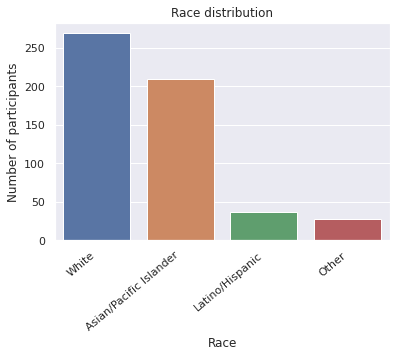

In [ ]:
sns.set(style="darkgrid")
race_dist = sns.countplot(x="Race of partner", data=speedDating_df)
race_dist.set_xlabel('Race')
race_dist.set_ylabel('Number of participants')
race_dist.set_title("Race distribution")
race_dist.set_xticklabels(race_dist.get_xticklabels(), rotation=40, ha="right")

print(speedDating_df['Race of partner'].value_counts())

It's quite clear that the distribution of our data is skewed pretty heavily towards white and Asian people.

**Gender**

Male      275
Female    269
Name: Gender, dtype: int64


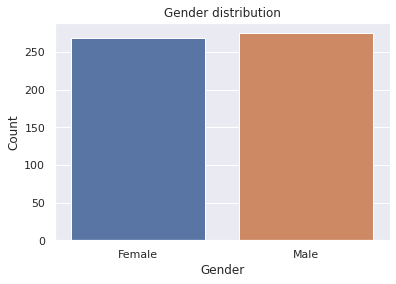

In [ ]:
race_dist = sns.countplot(x="Gender", data=speedDating_df)
race_dist.set_xlabel('Gender')
race_dist.set_ylabel('Count')
race_dist.set_title("Gender distribution")

print(speedDating_df['Gender'].value_counts())


From the figure above, there is about an equal distribution of gender among this dataset. There are 275 male participants and 269 female participants.

Let's see how many matches both genders get. 


No     237
Yes     32
Name: Match?, dtype: int64


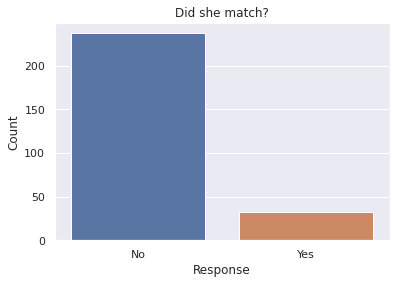

In [ ]:
speed = speedDating_df
speedF = speed[speed['Gender'] == 'Female']
speedM = speed[speed['Gender'] == 'Male']
speedF['Match?'].value_counts()
fmatch = sns.countplot(x="Match?", data = speedF)
fmatch.set_xlabel('Response')
fmatch.set_ylabel('Count')
fmatch.set_title("Did she match?")
print(speedF['Match?'].value_counts())

Oof. How about the men?

No     225
Yes     50
Name: Match?, dtype: int64


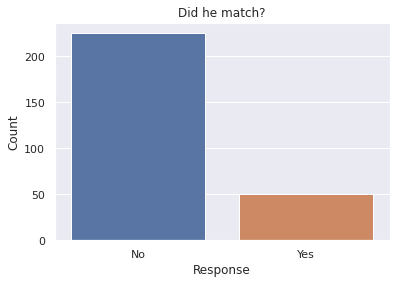

In [ ]:
mmatch = sns.countplot(x="Match?", data = speedM)
mmatch.set_xlabel('Response')
mmatch.set_ylabel('Count')
mmatch.set_title("Did he match?")
print(speedM['Match?'].value_counts())

A bit better, but still quite bleak. In terms of positive responses, it looks like being male made you more likely to match for the purposes of this experiment. Additionally, it looks like a clear majority of all dates in general did not result in a match. This answers another one of our questions.